In [2]:
import cv2
import os
import numpy as np
from skimage import feature,io
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
def PrepareData(data_dir = "Dates", img_size=(256, 256)):
    date_types = {
        'K': 'Sukkari', 'J': 'Ajwa', 'W': 'Safawi', 'Q': 'Saqi', 'B': 'Barhi', 'A': 'Amber', 'L': 'Medjool', 'I': 'Rabiah', 'S': 'Shalabi'
    }
    images = []
    labels = []
    label_to_index = {letter: i for i, letter in enumerate(date_types.keys())}
    
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = io.imread(img_path)

                if img is not None:
                    img = cv2.resize(img, img_size)
                    img = img / 255.0
                    images.append(img)
                    
                    label_letter = file[0].upper()
                    
                    if label_letter in label_to_index:
                        labels.append(label_to_index[label_letter])
                    else:
                        print(f"Warning: Unrecognized label for file {file}")
    
    return np.array(images), np.array(labels), date_types

In [4]:
def Segmentation(img):
    # Convert image to uint8
    img_uint8 = (img * 255).astype(np.uint8)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2GRAY)

    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY_INV,  #Just invert the binary image
        11,  # Block size (size of the neighborhood)
        2    # Constant subtracted from the mean
    )

    return binary

In [5]:
def FeatureExtraction(img):
    # Ensure the image is in uint8 format
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    
    # Convert to grayscale if it's not already
    if len(img.shape) > 2:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        gray = img
    
    features = feature.hog(gray, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1))
    return features

""" Other options were: 
SIFT (Scale-Invariant Feature Transform): Detecting and describing local features in images
SURF (Speeded Up Robust Features): Similar to SIFT but faster
Local Binary Pattern (LBP): Facial recognition"""

' Other options were: \nSIFT (Scale-Invariant Feature Transform): Detecting and describing local features in images\nSURF (Speeded Up Robust Features): Similar to SIFT but faster\nLocal Binary Pattern (LBP): Facial recognition'

In [6]:
def Denoising(image):
    # Convert image to 8-bit unsigned int if it's not already
    if image.dtype != np.uint8:
        image = cv2.convertScaleAbs(image)
    
    return cv2.bilateralFilter(image, 9, 75, 75)

In [7]:
# image = io.imread("Dates/WD1012_2.JPG")
# print(image.shape)
# image = cv2.resize(image, (128,128))
# plt.imshow(image)
# plt.show()

In [8]:
# denoised_bilateral = cv2.bilateralFilter(image, 9, 75, 75)
# # plt.imshow(denoised_bilateral)
# plt.title("Denoised Image using Bilateral Filter")
# plt.axis('off')
# plt.show()

In [9]:
# segmented_orig = Segmentation(image)
# segmented_denoise = Segmentation(denoised_bilateral)
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].imshow(segmented_orig, cmap='gray')
# ax[0].set_title("Segmented Image")
# ax[0].axis('off')
# ax[1].imshow(segmented_denoise, cmap='gray')
# ax[1].set_title("Segmented Denoised Image")
# ax[1].axis('off')
# plt.show()

In [11]:
def ResizeAndDenoiseImages(input_dir, output_dir, img_size=(128, 128)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = io.imread(img_path)

                if img is not None:
                    img = cv2.resize(img, img_size)
                    # img = Denoising(img)
                    output_path = os.path.join(output_dir, file)
                    io.imsave(output_path, img)
                    print(f"Processed and saved: {output_path}")

# Example usage
ResizeAndDenoiseImages('Sattar Denoise\Denoised Images', 'ProcessedDates')

Processed and saved: ProcessedDates\JD2001_1.jpg
Processed and saved: ProcessedDates\JD2001_2.jpg
Processed and saved: ProcessedDates\JD2001_3.jpg
Processed and saved: ProcessedDates\JD2001_4.jpg
Processed and saved: ProcessedDates\JD2001_5.jpg
Processed and saved: ProcessedDates\JD2001_6.jpg
Processed and saved: ProcessedDates\JD2001_7.jpg
Processed and saved: ProcessedDates\JD2001_8.jpg
Processed and saved: ProcessedDates\JD2002_1.jpg
Processed and saved: ProcessedDates\JD2002_2.jpg
Processed and saved: ProcessedDates\JD2002_3.jpg
Processed and saved: ProcessedDates\JD2002_4.jpg
Processed and saved: ProcessedDates\JD2002_5.jpg
Processed and saved: ProcessedDates\JD2002_6.jpg
Processed and saved: ProcessedDates\JD2002_7.jpg
Processed and saved: ProcessedDates\JD2002_8.jpg
Processed and saved: ProcessedDates\JD2003_1.jpg
Processed and saved: ProcessedDates\JD2003_2.jpg
Processed and saved: ProcessedDates\JD2003_3.jpg
Processed and saved: ProcessedDates\JD2003_4.jpg
Processed and saved:

In [11]:
X, y, date_types = PrepareData(img_size=(128, 128))

In [ ]:
def Augmentation_Processing(img, label, num_augmentations=5):
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    features_list = []
    labels_list = []
    
    # Process original image
    denoised = Denoising(img)
    segmented = Segmentation(denoised)
    features = FeatureExtraction(segmented)
    features_list.append(features)
    labels_list.append(label)
    
    # Generate and process augmented images
    img = img.reshape((1,) + img.shape)  # Reshape for ImageDataGenerator
    augmented_images = datagen.flow(img, batch_size=1)
    
    for _ in range(num_augmentations):
        aug_img = next(augmented_images)[0]
        aug_segmented = Segmentation(aug_img)
        aug_features = FeatureExtraction(aug_segmented)
        features_list.append(aug_features)
        labels_list.append(label)
    
    return features_list, labels_list

In [19]:
def FinalStage(X , y):
    X_processed = []
    y_processed = []

    for img, label in zip(X, y):
        features, labels = Augmentation_Processing(img, label)
        X_processed.extend(features)
        y_processed.extend(labels)

    X_processed = np.array(X_processed)
    y_processed = np.array(y_processed)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    print(f"Processed data shape: {X_processed.shape}, {y_processed.shape}")
    print(f"Number of classes: {len(np.unique(y_processed))}")

    return X_train, X_test, X_val, y_train, y_test, y_val

In [38]:
X, y, date_types = PrepareData(img_size=(128, 128))

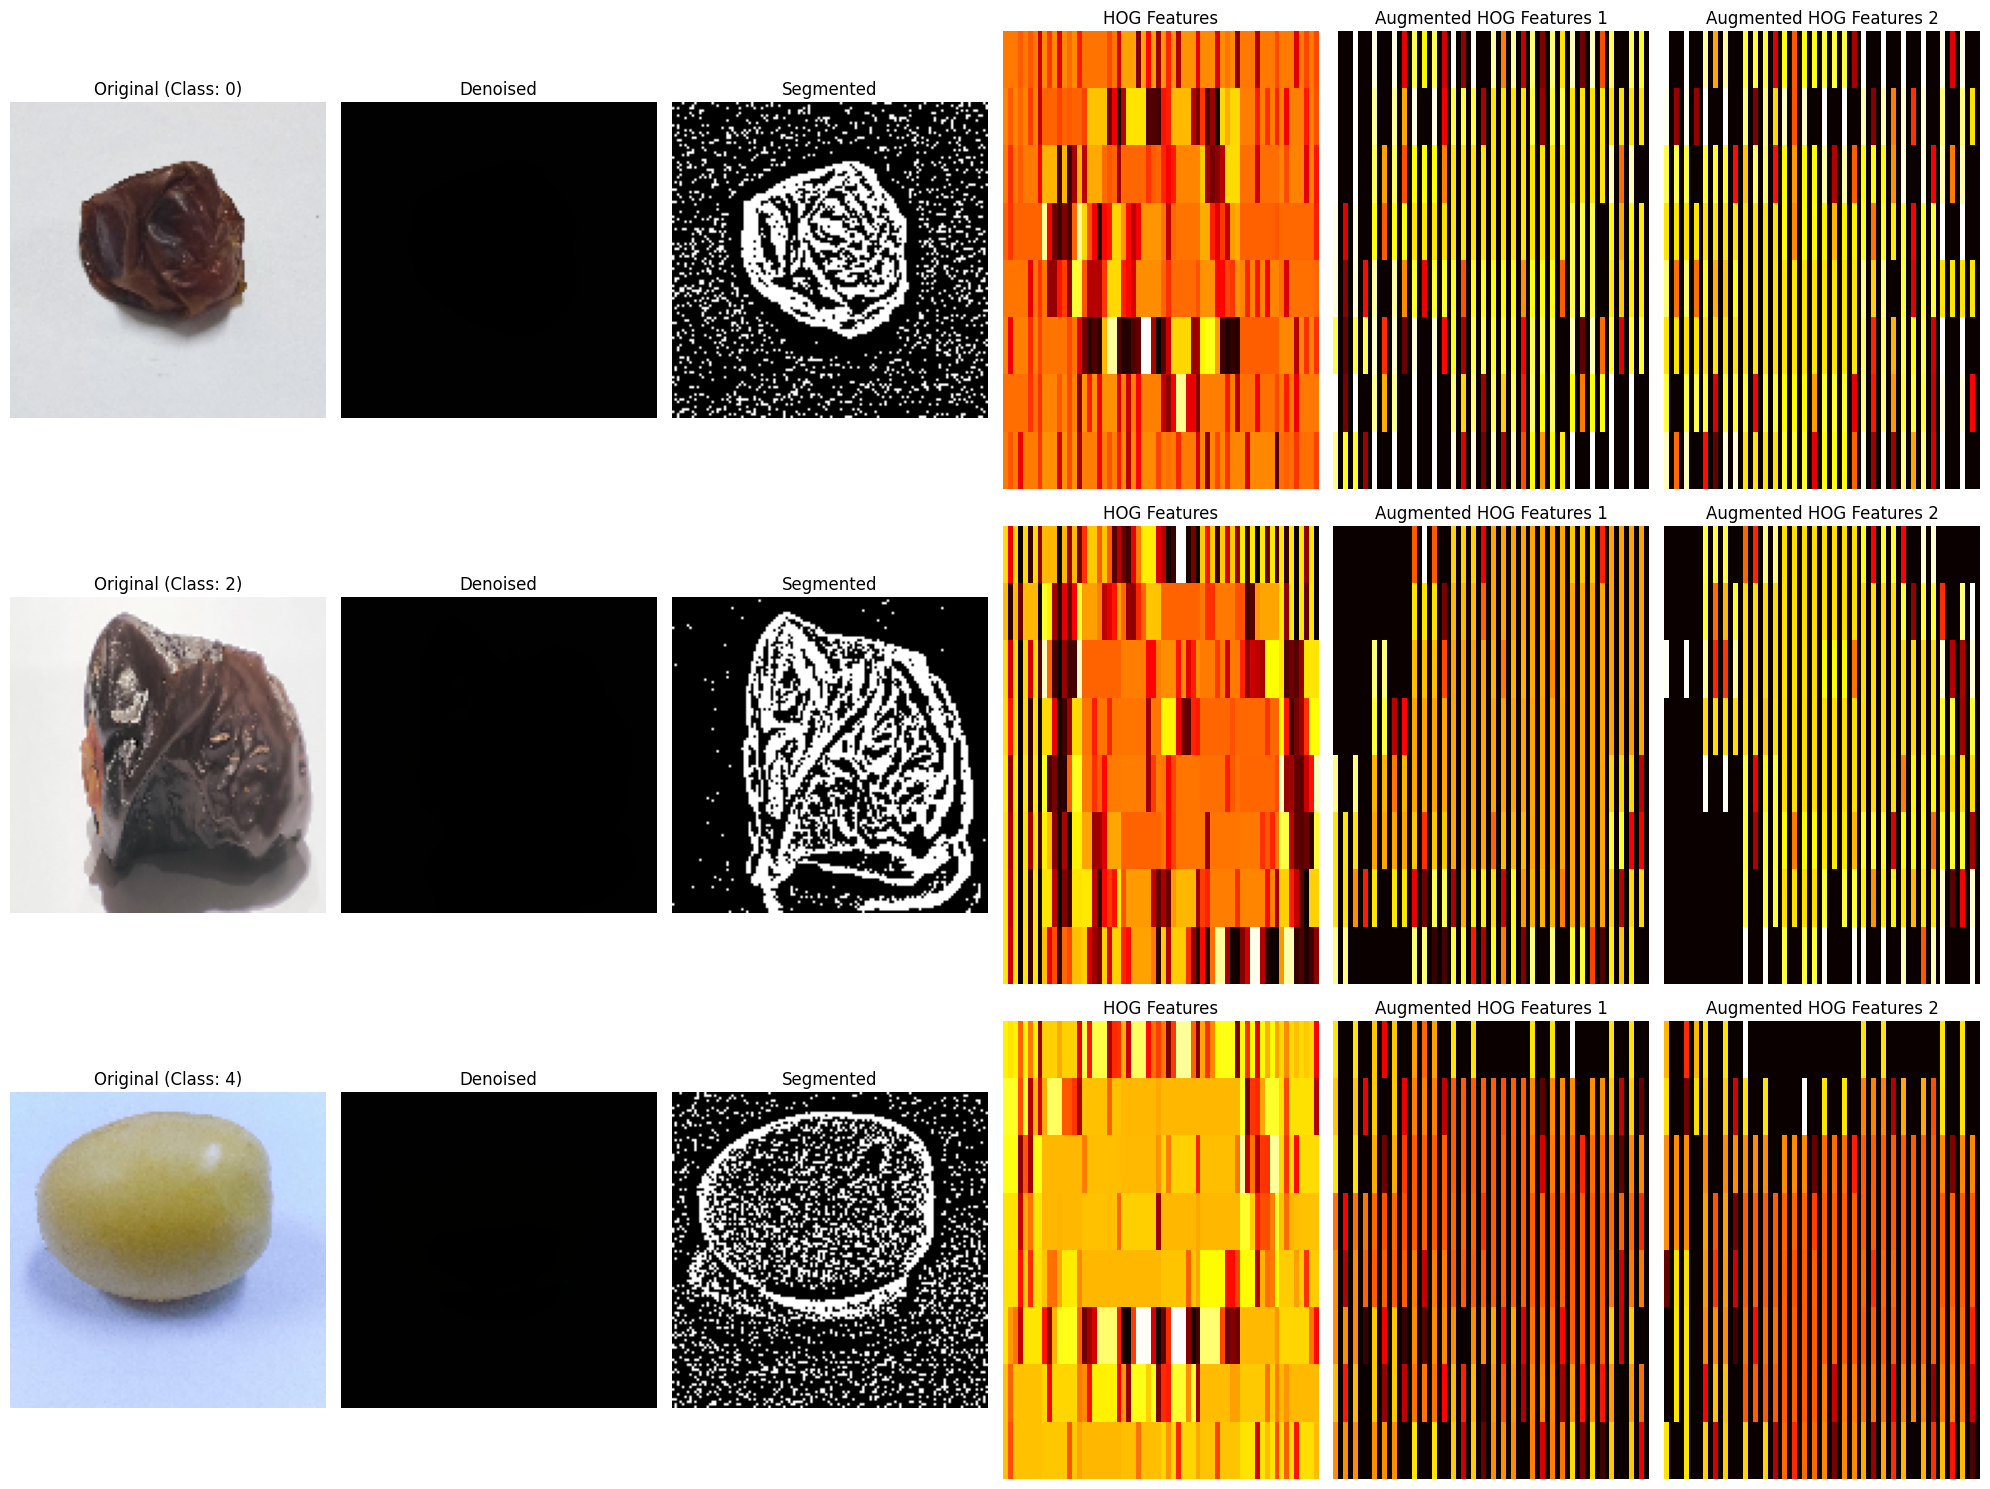

In [21]:
# Assuming X and y are your image data and labels
num_samples = 3  # Number of images to process
selected_indices = np.random.choice(len(X), num_samples, replace=False)

plt.figure(figsize=(20, 5*num_samples))

for i, idx in enumerate(selected_indices):
    img = X[idx]
    label = y[idx]

    # Original Image
    plt.subplot(num_samples, 6, i*6 + 1)
    plt.imshow(img)
    plt.title(f"Original (Class: {label})")
    plt.axis('off')

    # Denoised Image
    denoised = Denoising(img, noise_type='bilateral')
    plt.subplot(num_samples, 6, i*6 + 2)
    plt.imshow(denoised)
    plt.title("Denoised")
    plt.axis('off')

    # Segmentation
    segmented = Segmentation(img)
    plt.subplot(num_samples, 6, i*6 + 3)
    plt.imshow(segmented, cmap='gray')
    plt.title("Segmented")
    plt.axis('off')

    # Feature Extraction
    features = FeatureExtraction(img)
    plt.subplot(num_samples, 6, i*6 + 4)
    plt.imshow(features.reshape((8, -1)), cmap='hot', aspect='auto')
    plt.title("HOG Features")
    plt.axis('off')

    # Augmentation
    aug_features, aug_labels = Augmentation_Processing(img, label, num_augmentations=2)
    plt.subplot(num_samples, 6, i*6 + 5)
    plt.imshow(aug_features[1].reshape((8, -1)), cmap='hot', aspect='auto')
    plt.title("Augmented HOG Features 1")
    plt.axis('off')

    plt.subplot(num_samples, 6, i*6 + 6)
    plt.imshow(aug_features[2].reshape((8, -1)), cmap='hot', aspect='auto')
    plt.title("Augmented HOG Features 2")
    plt.axis('off')

plt.tight_layout()
plt.show()

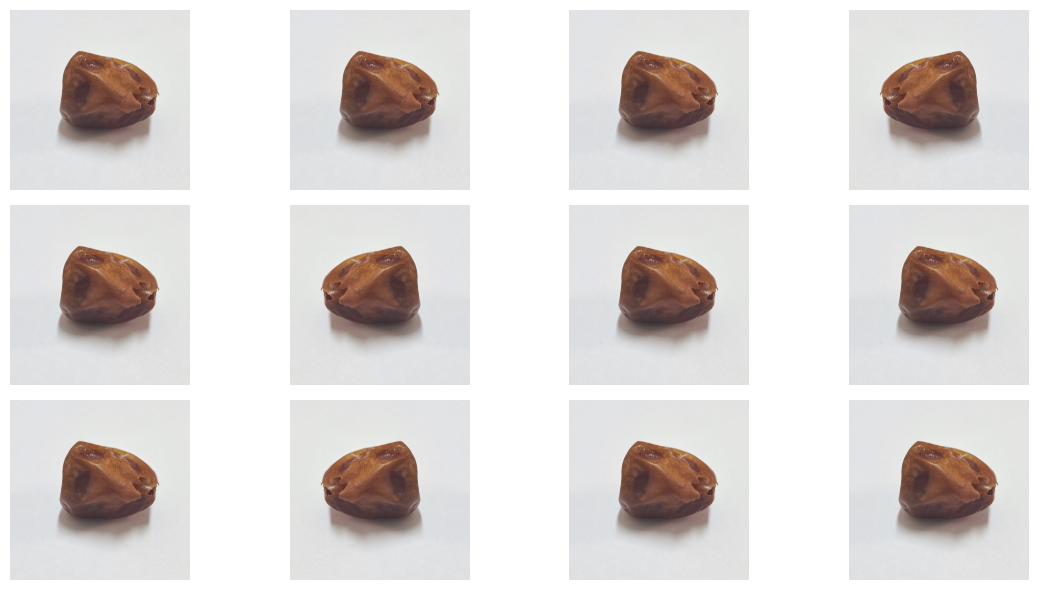

In [ ]:
import tensorflow as tf

# Define the image data generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

)

image_path = 'Dates/KD3001_1.jpg'
image = tf.keras.preprocessing.image.load_img(image_path)
x = tf.keras.preprocessing.image.img_to_array(image)
x = np.expand_dims(x, axis=0)

# Generate and display augmented images
plt.figure(figsize=(12, 6))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    plt.axis('off')
    if i == 11: 
        break
plt.tight_layout()
plt.show()